<h1>MNIST dataset</h1>

In [1]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


<p>Dividing the data and droping the label column from train and test data</p>

In [3]:
train_label , test_label = train['label'] , test['label']
train.drop(['label'], axis=1, inplace=True)
test.drop(['label'], axis=1, inplace=True)



In [4]:
train.info()
train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 1x1 to 28x28
dtypes: int64(784)
memory usage: 358.9 MB


(60000, 784)

<p>Plotting an image to visualise our data properly</p>

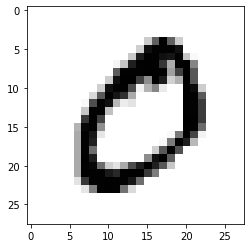

In [5]:
num1 = train[1:2].to_numpy()
num1_image = num1.reshape(28,28)
plt.imshow(num1_image, cmap = mlp.cm.binary, interpolation="nearest")
#plt.axis("off")


Scaling our data using MinMaxScaler to bring data in the range of 0 to 1

In [6]:
x_train , y_train = train.to_numpy() , train_label.to_numpy()
x_test , y_test = test.to_numpy() , test_label.to_numpy() 
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
x_train , x_test = scaler.fit_transform(x_train) , scaler.fit_transform(x_test)

<h2>Model Selection</h3>
<p>a. K-Nearest Neighbours</p>

In [7]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=100)
model.fit(x_train , y_train)
#model.predict_proba(x_train)
knn_predictions  = model.predict(x_train)
knn_cm = confusion_matrix(y_train , knn_predictions)


[[5840    7    5    1    1   15   43    3    3    5]
 [   0 6691   16    5   10    0    4    9    1    6]
 [  82  226 5349   31   19   13   30  157   34   17]
 [  14   76   35 5737    3   78   12   77   44   55]
 [   5  127    1    1 5429    1   32   11    3  232]
 [  25   63    3   89   16 5044   85    6    9   81]
 [  48   41    0    0    6   33 5789    0    1    0]
 [   7  174   12    2   23    1    1 5935    1  109]
 [  38  198   11  157   34  126   43   32 5064  148]
 [  28   52    6   73   45    9    4  120   11 5601]]


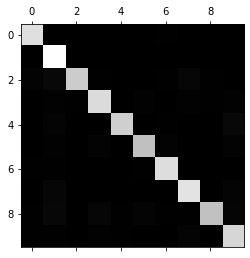

In [8]:
print(knn_cm)
plt.matshow(knn_cm, cmap=plt.cm.gray)
plt.show()
knn_cr = classification_report(y_train , knn_predictions, output_dict = True )


<p>b.Decision tree</p>

In [9]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth=15)
tree_clf.fit(x_train,y_train)
tree_predictions = tree_clf.predict(x_train)


[[5901    0    4    3    4    3    1    0    6    1]
 [   1 6711   12    5    2    0    2    6    1    2]
 [   5   10 5872    6   17    3    0   26   12    7]
 [   6    9   34 5997    9   23    1   22   12   18]
 [  11    5    2    7 5734    2    2    4    8   67]
 [  15    7    8   24   12 5310    7    4    8   26]
 [  22   10    2    0   16    4 5846    0   18    0]
 [   3    9   18    0   19    2    1 6182    1   30]
 [   2   34    8    8   24    4    4    5 5709   53]
 [  12    7    6   18   36   17    1   37   11 5804]]


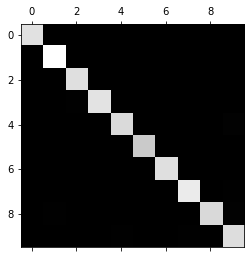

In [10]:
tree_cm = confusion_matrix(y_train , tree_predictions)
print(tree_cm)
plt.matshow(tree_cm, cmap=plt.cm.gray)
plt.show()
tree_cr = classification_report(y_train , tree_predictions, output_dict = True )

In [11]:
from sklearn.metrics import precision_score, recall_score
recall_score(y_train, tree_predictions , average = "weighted")

0.9844333333333334

<p>c. Naive Bayes</p>

In [12]:
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# gnb.fit(x_train , y_train)
# gnb_prediction = gnb.predict(x_train)


In [13]:
# gnb_cm = confusion_matrix(y_train ,gnb_prediction )
# print(gnb_cm)
# plt.matshow(gnb_cm, cmap=plt.cm.gray)
# plt.show()
# gnb_cr = classification_report(y_train , gnb_prediction, output_dict = True )

d. Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(min_samples_leaf=25)
rf.fit(x_train, y_train)
rf_prediction = rf.predict(x_train)

[[5834    0    6    1    4    6   19    3   46    4]
 [   0 6608   43   21   13    8   12   15   14    8]
 [  27   10 5701   26   46    6   30   54   40   18]
 [   8   12   92 5789   10   50   15   54   69   32]
 [  11    6   12    0 5627    1   31   13   17  124]
 [  24   18   10   56   13 5169   51   10   42   28]
 [  29   11    6    0   14   45 5786    1   26    0]
 [   4   28   67    5   42    1    0 6008   18   92]
 [  14   35   39   56   28   40   31    5 5526   77]
 [  28   12   23   87   82   20    4   66   49 5578]]


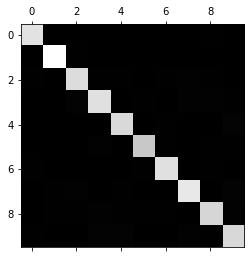

In [15]:
rf_cm = confusion_matrix(y_train ,rf_prediction )
print(rf_cm)
plt.matshow(rf_cm, cmap=plt.cm.gray)
plt.show()
rf_cr = classification_report(y_train , rf_prediction, output_dict = True )

e. Support Vector Machine

In [16]:
# from sklearn.svm import LinearSVC
# r = [5000,10000,15000,20000]
# s=[]
# for i in r:
#     svc = LinearSVC(max_iter=10000 )
#     svc.fit(x_train,y_train)
#     svc_predictions = svc.predict(x_train)


In [17]:
# svc_cm = confusion_matrix(y_train ,svc_predictions )
# print(svc_cm)
# plt.matshow(svc_cm, cmap=plt.cm.gray)
# plt.show()
# svc_cr = (classification_report(y_train , svc_predictions, output_dict = True ))


f. Neural Network

In [18]:
from sklearn.neural_network import MLPClassifier
dnn_classifier = MLPClassifier(hidden_layer_sizes = [75]*3)
dnn_classifier.fit(x_train, y_train)
dnn_predictions = dnn_classifier.predict(x_train)
    


[[5923    0    0    0    0    0    0    0    0    0]
 [   0 6742    0    0    0    0    0    0    0    0]
 [   0    0 5958    0    0    0    0    0    0    0]
 [   0    0    0 6131    0    0    0    0    0    0]
 [   0    0    0    0 5842    0    0    0    0    0]
 [   0    0    0    0    0 5421    0    0    0    0]
 [   0    0    0    0    0    0 5918    0    0    0]
 [   0    0    0    0    0    0    0 6265    0    0]
 [   0    0    0    0    0    0    0    0 5851    0]
 [   0    0    0    0    0    0    0    0    0 5949]]


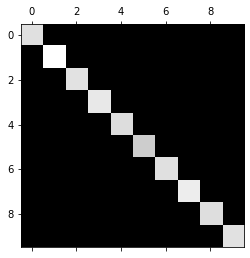

In [19]:
dnn_cm = confusion_matrix(y_train ,dnn_predictions )
print(dnn_cm)
plt.matshow(dnn_cm, cmap=plt.cm.gray)
plt.show()
dnn_cr = (classification_report(y_train , dnn_predictions, output_dict = True ))
dnn_cr = pd.DataFrame(dnn_cr).transpose()


In [20]:
knn_cr = pd.DataFrame(knn_cr).transpose()
tree_cr = pd.DataFrame(tree_cr).transpose()
#gnb_cr = pd.DataFrame(gnb_cr).transpose()
rf_cr = pd.DataFrame(rf_cr).transpose()
#svc_cr = pd.DataFrame(svc_cr).transpose()


In [21]:

print("k-nearest neighbors")
print(knn_cr[::][10:])
print("Decision Tree")
print(tree_cr[::][10:])
# print("Naive Bayes")
# print(gnb_cr[::][10:])
print("Random Forest")
print(rf_cr[::][10:])
# print("Support Vector Machine")
# print(svc_cr[::][10:])
print("Neural Network")
print(dnn_cr[::][10:])

    
    

k-nearest neighbors
              precision    recall  f1-score       support
accuracy       0.941317  0.941317  0.941317      0.941317
macro avg      0.944576  0.940423  0.941430  60000.000000
weighted avg   0.943437  0.941317  0.941274  60000.000000
Decision Tree
              precision    recall  f1-score       support
accuracy       0.984433  0.984433  0.984433      0.984433
macro avg      0.984476  0.984238  0.984340  60000.000000
weighted avg   0.984473  0.984433  0.984436  60000.000000
Random Forest
              precision    recall  f1-score       support
accuracy       0.960433  0.960433  0.960433      0.960433
macro avg      0.960189  0.960166  0.960160  60000.000000
weighted avg   0.960432  0.960433  0.960416  60000.000000
Neural Network
              precision  recall  f1-score  support
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0  60000.0
weighted avg        1.0     1.0       1.0  60000.0


<h3>Final model selection</h3>

In [22]:
dnn_classifier.fit(x_test, y_test)
dnn_pred = dnn_classifier.predict(x_test)
print(sklearn.metrics.accuracy_score(y_test,dnn_pred))


1.0


In [23]:
tree_clf.fit(x_test,y_test)
tree_pred = tree_clf.predict(x_test)
print(sklearn.metrics.accuracy_score(y_test,tree_pred))

0.9936
